In [ ]:
from google.colab import drive
from sklearn import metrics
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline
import os
drive.mount('/content/gdrive')



In [ ]:
print(os.listdir("/content/gdrive/MyDrive/ML"))

['test.csv', 'train.csv', 'sample.csv']


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/ML/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/ML/test.csv')


In [ ]:
sample = pd.read_csv('/content/gdrive/MyDrive/ML/sample.csv')


In [ ]:
print("train data shape: ",train.shape)
print("Test data shape: ",test.shape)


train data shape:  (913000, 4)
Test data shape:  (45000, 4)


In [ ]:
train.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
train.isnull().sum()


date     0
store    0
item     0
sales    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


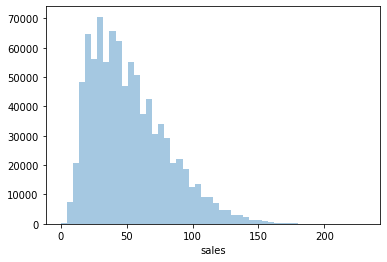

In [ ]:
sns.distplot(train['sales'],kde = False)
plt.show()

In [ ]:
all_data = train.append(test,sort = False)
all_data.shape

(958000, 5)

In [ ]:
all_data.tail()

,date,store,item,sales,id
44995,2018-03-27,10,50,NaN,44995.0
44996,2018-03-28,10,50,NaN,44996.0
44997,2018-03-29,10,50,NaN,44997.0
44998,2018-03-30,10,50,NaN,44998.0
44999,2018-03-31,10,50,NaN,44999.0


In [ ]:
all_data['date'] = pd.to_datetime(all_data['date'])
all_data.dtypes

date     datetime64[ns]
store             int64
item              int64
sales           float64
id              float64
dtype: object

In [ ]:
all_data['year'] = all_data['date'].dt.year
all_data['month'] = all_data['date'].dt.month
all_data['day'] = all_data['date'].dt.day
all_data['week'] = all_data['date'].dt.week
all_data['weekofyear'] = all_data['date'].dt.weekofyear
all_data['dayofweek'] = all_data['date'].dt.dayofweek
all_data['weekday'] = all_data['date'].dt.weekday
all_data['dayofyear'] = all_data['date'].dt.dayofyear
all_data['quarter'] = all_data['date'].dt.quarter
all_data['is_month_start'] = all_data['date'].dt.is_month_start
all_data['is_month_end'] = all_data['date'].dt.is_month_end
all_data['is_quarter_start'] = all_data['date'].dt.is_quarter_start
all_data['is_quarter_end'] = all_data['date'].dt.is_quarter_end
all_data['is_year_start'] = all_data['date'].dt.is_year_start
all_data['is_year_end'] = all_data['date'].dt.is_year_end

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [ ]:
all_data.head()

,date,store,item,sales,id,year,month,day,week,weekofyear,dayofweek,weekday,dayofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,2013-01-01,1,1,13.0,NaN,2013,1,1,1,1,1,1,1,1,True,False,True,False,True,False
1,2013-01-02,1,1,11.0,NaN,2013,1,2,1,1,2,2,2,1,False,False,False,False,False,False
2,2013-01-03,1,1,14.0,NaN,2013,1,3,1,1,3,3,3,1,False,False,False,False,False,False
3,2013-01-04,1,1,13.0,NaN,2013,1,4,1,1,4,4,4,1,False,False,False,False,False,False
4,2013-01-05,1,1,10.0,NaN,2013,1,5,1,1,5,5,5,1,False,False,False,False,False,False


In [ ]:
sales = all_data['sales']
all_data = all_data.drop('sales',axis=1)
all_data['sales'] = sales

In [ ]:
all_data = all_data.drop('date',axis=1)
all_columns = list(all_data.columns)

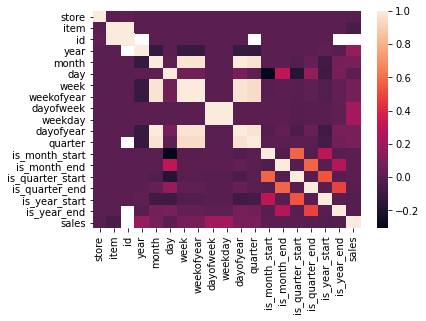

In [ ]:
corr = all_data[all_columns].corr()
sns.heatmap(corr)

In [ ]:
print (corr['sales'].sort_values(ascending=False), '\n') 


sales               1.000000
dayofweek           0.222608
weekday             0.222608
year                0.182360
quarter             0.093867
month               0.087414
dayofyear           0.086347
weekofyear          0.084745
week                0.084745
day                 0.002791
is_month_end        0.000342
is_month_start     -0.000575
is_quarter_start   -0.000819
is_quarter_end     -0.005447
store              -0.008170
is_year_end        -0.020926
is_year_start      -0.029314
item               -0.055998
id                       NaN
Name: sales, dtype: float64 



In [ ]:
all_columns = ['store','item','year','month','day','week','weekofyear','dayofweek','weekday','dayofyear',
               'quarter','is_month_start','is_month_end','is_quarter_start','is_quarter_end','is_year_start',
               'is_year_end']

selected_columns = ['store','item','year','month','day','week','weekofyear','dayofweek','weekday','dayofyear',
               'quarter']

train_new = all_data[all_data['sales'].notnull()]
test_new = all_data[all_data['sales'].isnull()]


X = train_new[selected_columns]
y = train_new['sales']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)
predict1 = model1.predict(X_test)


In [ ]:
model1.coef_

array([-7.76103497e-02, -1.11440937e-01,  4.25509040e+00,  1.96031718e+02,
        6.45656034e+00, -9.97648140e-03, -9.97648140e-03,  1.59765125e+00,
        1.59765125e+00, -6.46494570e+00,  4.96196520e+00])

In [ ]:
model1.intercept_

-8736.641627333212

In [ ]:
print('linear regression value:')
model1.score(X_train, y_train)


linear regression value:


0.12171507222560718

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred =regressor.predict(X_test)

In [ ]:
y_pred

array([71., 46., 33., ..., 39., 40., 49.])

In [ ]:
from sklearn.metrics import r2_score
print(f'the decision tree value  :{r2_score(y_test,y_pred)}')


In [ ]:
#support vector machine
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train, y_train)

In [ ]:
y_pred =svc.predict(X_test)
confusion_matrix(X_test,y_pred)